In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense , Input
import numpy as np
print("Version of tensorflow is : ",tf.__version__)
from tensorflow.python.keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

Version of tensorflow is :  2.13.0


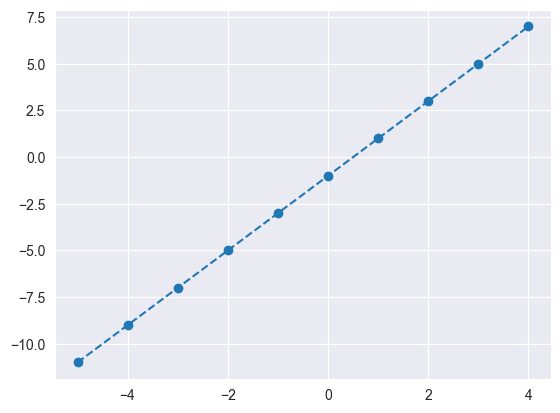

In [3]:
xs = np.arange(-5,5,1).astype('float32')
ys = xs * 2 - 1
plt.plot(xs , ys,'o--')

Model using **MSE** loss

In [4]:
input = Input(shape=(1,) , name="input_layer")
output_layer = Dense(1 , name="output_layer")(input)
model_mse_loss = tf.keras.models.Model(inputs=input , outputs=output_layer)
model_mse_loss.compile(optimizer="sgd" , loss="mse")
model_mse_loss.fit(xs,ys,epochs=500,verbose=0)
model_mse_loss.predict([[10.0]])

1/1 [==============================] - 0s 56ms/step


array([[19.000086]], dtype=float32)

In [5]:
model_mse_loss.get_weights()

[array([[2.0000036]], dtype=float32), array([-0.9999509], dtype=float32)]

In [7]:
#plot_model(model_mse_loss , to_file="mse_loss_model.png" , show_layer_names=True , show_shapes=True)
print(model_mse_loss.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Model with **Huber** Loss

In [8]:
def huber_loss(y_true , y_pred):
    thresold = 1
    error = y_true - y_pred
    return_type = tf.abs(error) <= thresold
    r1 = 0.5 * tf.square(error)
    r2 = thresold * (tf.abs(error) - (0.5*thresold))
    return tf.where(return_type , r1 , r2)

In [9]:
input = Input(shape=(1,) , name="input_layer")
output_layer = Dense(1 , name="output_layer")(input)
model_huber_loss = tf.keras.models.Model(inputs=input , outputs=output_layer)
model_huber_loss.compile(optimizer="sgd" , loss=huber_loss)
model_huber_loss.fit(xs,ys,epochs=500,verbose=0)
model_huber_loss.predict([[10.0]])

1/1 [==============================] - 0s 48ms/step


array([[19.01609]], dtype=float32)

In [10]:
model_huber_loss.get_weights()

[array([[2.0006418]], dtype=float32), array([-0.99032855], dtype=float32)]

In [11]:
#plot_model(model_huber_loss , to_file="huber_loss_model.png" , show_layer_names=True , show_shapes=True)
print(model_huber_loss.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
